# Netology: Feature Selection 
Итоговая работа

Группа: DVP-8A, июнь-июль 2020 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
import scipy.stats as sts

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

## 1. Загрузка данных

In [2]:
data = pd.read_csv('taxi.csv')
data.head(5)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


- offer_gk – unique offer identifier (INT)
- weekday_key – day of week number (Sunday = 0, Monday = 1, etc.) (INT)
- hour_key – hour of day representing an hour part of datetime (value from 0 to 23) (INT)
- driver_gk – unique driver identifier (INT)
- order_gk – unique order identifier (INT). Order may have multiple offers
- driver_latitude – latitude of driver at the time of getting an offer (FLOAT) 
- driver_longitude – longitude of driver at the time of receiving an offer (FLOAT)
- origin_order_latitude – latitude of the order start location at the time of receiving an offer (FLOAT)
- origin_order_longitude – longitude of the order start location at the moment of receiving an offer (FLOAT)
- distance_km – estimated distance from origin to destination in kilometres (FLOAT). Value -1 means that the destination is not set
- duration_min – estimated duration from origin to destination in minutes (FLOAT). Value -1 means that the destination is not set
- offer_class_group – class of the order, e.g. Economy, Business, XL (VARCHAR)
- ride_type_desc – private or business order attribute (VARCHAR)
- driver_response – driver choice of whether to accept the offer or not (VARCHAR) 

## 2. Обзор данных 

In [3]:
data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offer_gk                100000 non-null  int64  
 1   weekday_key             100000 non-null  int64  
 2   hour_key                100000 non-null  int64  
 3   driver_gk               100000 non-null  int64  
 4   order_gk                100000 non-null  int64  
 5   driver_latitude         100000 non-null  float64
 6   driver_longitude        100000 non-null  float64
 7   origin_order_latitude   100000 non-null  float64
 8   origin_order_longitude  100000 non-null  float64
 9   distance_km             100000 non-null  float64
 10  duration_min            100000 non-null  float64
 11  offer_class_group       100000 non-null  object 
 12  ride_type_desc          100000 non-null  object 
 13  driver_response         100000 non-null  int64  
dtypes: float64(6), int64(

### целевая переменная: driver_response – driver choice of whether to accept the offer or not (VARCHAR)

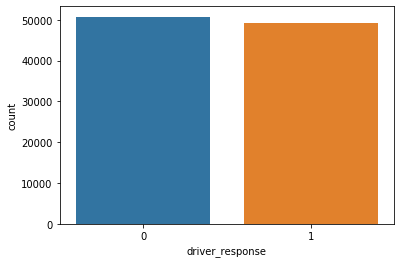

In [5]:
data.driver_response.value_counts()
sns.countplot(x='driver_response', data=data)

- примерно одинаковое количество принятых заказов и отказов

In [6]:
data.groupby('driver_response').mean()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min
driver_response,,,,,,,,,,,
0,564563.482405,3.081731,13.687204,3414.790708,460431.188131,55.810123,37.520704,55.804834,37.517102,24.104886,28.096894
1,567924.931083,3.240375,13.972669,3478.926616,461316.147478,55.588188,37.463013,55.739057,37.566922,12.507728,18.021251


- среднее значение расстояния и времени поездки у принятых и отвергнутых заказов отличается практически в два раза - параметры весьма важные для модели

### offer_gk – уникальный идентификатор предложения
- равномерное распределение
- в итоговой модели роли не играет - убрать

100000

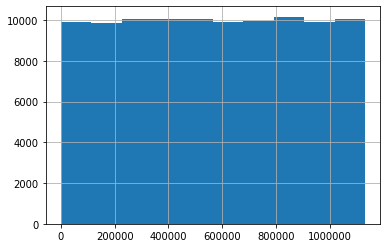

In [7]:
data.offer_gk.hist()
data.offer_gk.nunique()

**driver_gk**

439

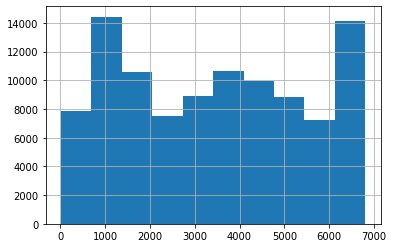

In [8]:
data.driver_gk.hist()
data.driver_gk.nunique()

- 439 водителей рассматривают 100 тыс. заказов 
- можно проверить, все ли водители берут (всреднем) одинаковое количество заказов, вероятно, что водители имеют предпочтения по типам поездок, свой стиль\режим работы
- из распределения видно, что к некоторым водителям попадает больше заказов (по крайней мере, на рассмотрение) 

### order_gk – unique order identifier (INT). Order may have multiple offers
- номер заказа
- на вид - равномерное распределение
- абсолютное значение номера не имеет значения

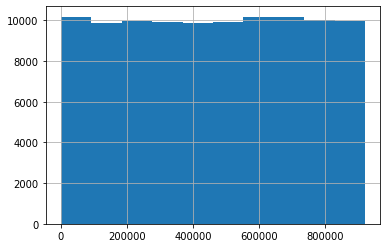

In [9]:
data.order_gk.hist()

In [10]:
orders = data.groupby(by='order_gk').count()
print('Возможные варианты количеств предложений (offer) по заявкам (orders):\n', orders.offer_gk.unique())
print('Количество заявок, которые предлагались несколько раз:', len(orders[orders.offer_gk > 1]))

Возможные варианты количеств предложений (offer) по заявкам (orders):
 [ 1  3  5  4  2 10  6  7  8  9 11 12 13 14]
Количество заявок, которые предлагались несколько раз: 9276


- некоторые заявки предлагаются разным (?) таксистам несоколько раз - вплоть до 14
- ? отличается результат offer при повторных предложениях (order) (как влияют повторные order на судьбу offer)?
- заявок, которые предлагались повторно - почти 10% - довольно много - как то это нужно учесть

### weekday_key – day of week number (Sunday = 0, Monday = 1, etc.) (INT)
- день недели
- не корректных данных нет
- распределение решений таксистов по дням недели не равномерное.
- день недели важен - признак перекодировать

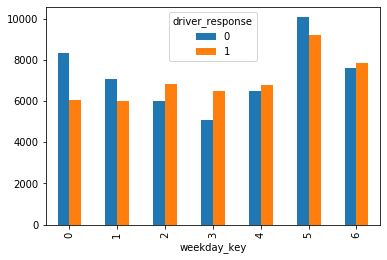

In [11]:
pd.crosstab(data.weekday_key, data.driver_response).plot(kind='bar')

### hour_key – hour of day representing an hour part of datetime (value from 0 to 23) 
- примерно с  20.00 до 6.00 (вечер и ночь) отказов больше
- количество обращений по часам не равномерно

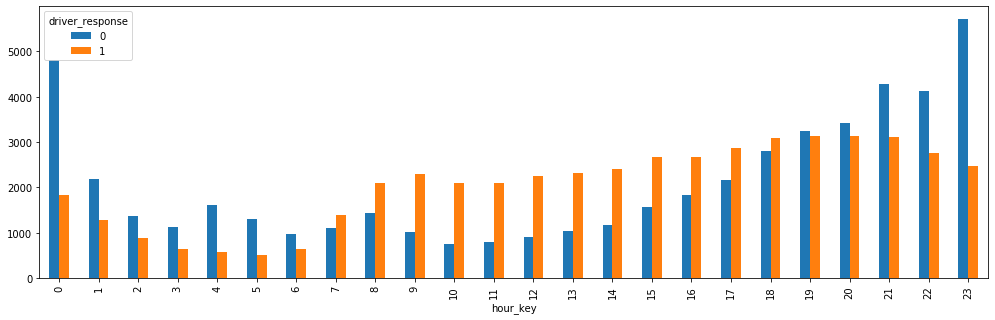

In [12]:
pd.crosstab(data.hour_key, data.driver_response).plot(kind='bar', figsize=(17, 5))

### Координаты водителя и клиента
- driver_latitude – latitude of driver at the time of getting an offer (FLOAT)
- driver_longitude – longitude of driver at the time of receiving an offer (FLOAT)
- origin_order_latitude – latitude of the order start location at the time of receiving an offer (FLOAT)
- origin_order_longitude – longitude of the order start location at the moment of receiving an offer (FLOAT)

- пересчитать в расстояние между водителем и клиентом
- проверить на выбросы
- если найти информацию по районам города и уровнем благополучия в них, то, определив по координам район, можно создать признак "благополучия" (в плохие районы, вероятно, менее охотно поедут)

In [13]:
data.driver_latitude.describe()

count    100000.000000
mean         55.700824
std           2.135903
min          -1.000000
25%          55.708651
50%          55.772904
75%          55.960667
max          56.174097
Name: driver_latitude, dtype: float64

- -1 в координате = пропуск

### distance_km – estimated distance from origin to destination in kilometres (FLOAT). Value -1 means that the destination is not set
- 75% поездок - не дальше 31 км 
- 99% поездок - в радиусе 75 км
- 99.9% - 130 км
- всеми дальними поездками (более 130 км) = 0.1% пренебречь

count    100000.000000
mean         18.393518
std          41.129296
min          -1.000000
25%          -1.000000
50%          10.411500
75%          30.665250
max        5234.283000
Name: distance_km, dtype: float64

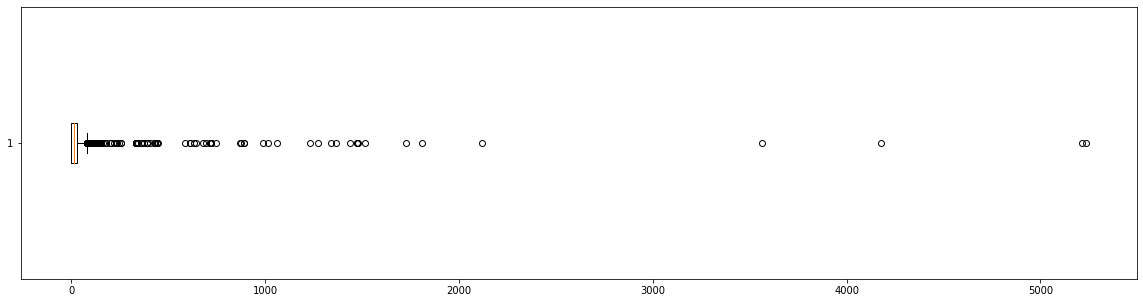

In [14]:
plt.figure(figsize=(20,5))
plt.boxplot(data.distance_km, vert=False)
data.distance_km.describe()

99% заказов на дистанцию: 75.35114999999992 км.
99.9% заказов на дистанцию: 129.06530700000116 км.
100


{'whiskers': [<matplotlib.lines.Line2D at 0x1b5c26ec748>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5c26e1508>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5c26dd808>],
 'medians': [<matplotlib.lines.Line2D at 0x1b5c26e4c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5c26e4448>],
 'means': []}

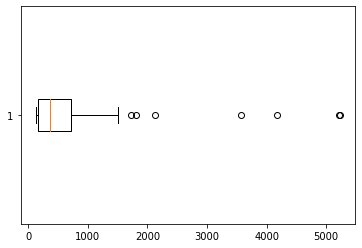

In [15]:
print('99% заказов на дистанцию:', data.distance_km.quantile(0.99), 'км.')
print('99.9% заказов на дистанцию:', data.distance_km.quantile(0.999), 'км.')
print(len(data[data.distance_km > data.distance_km.quantile(0.999)]))
plt.boxplot(data[data.distance_km > data.distance_km.quantile(0.999)].distance_km, vert=False)

In [16]:
# исключиь дальние поездки
data = data[data.distance_km < 130]
data.shape

(99901, 14)

In [17]:
# короткие поездки
data[(data.distance_km > 0) & (data.distance_km < 0.5)].distance_km.describe()

count    64.000000
mean      0.202641
std       0.161499
min       0.005000
25%       0.045500
50%       0.176500
75%       0.337000
max       0.490000
Name: distance_km, dtype: float64

- 64 поездки на расстояние, меньше пол километра - скорее статистический выброс - исключить из рассмотрения

In [18]:
data = data[(data.distance_km < 0) | (data.distance_km > 0.5)]

In [19]:
# неизвестные расстояния на момент заказа
data[data.distance_km  < 0].shape

(26207, 14)

- 26207 записей не содержат информацию о пункте назначения
- это можно считать за пропуск

### duration_min – estimated duration from origin to destination in minutes (FLOAT). Value -1 means that the destination is not set
- параметр, по-идее, должен быть связан с distance_km
- учитывает загруженность дорог

### offer_class_group – class of the order, e.g. Economy, Business, XL (VARCHAR)

In [20]:
data.offer_class_group.value_counts()

Economy     48189
Standard    47144
Premium      1765
Delivery     1285
Kids          586
XL            457
VIP           221
VIP+           29
Test            8
Name: offer_class_group, dtype: int64

- много классов, большая часть классов имеет мало представителей
- premium, vip, vip+ - объединить как близкие по смыслу

In [21]:
data.loc[data.offer_class_group.isin(['VIP', 'VIP+']), 'offer_class_group'] = 'Premium'


In [22]:
data[data.offer_class_group.isin(['Test'])]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
12092,849177,5,20,3763,83260,55.820917,37.650258,55.827038,37.660981,-1.0,-1.0,Test,SMB,0
31035,1122239,3,23,6290,493264,55.959273,37.415073,55.962322,37.407117,-1.0,-1.0,Test,SMB,0
43940,897797,5,20,591,83260,55.821477,37.611275,55.827038,37.660981,-1.0,-1.0,Test,SMB,1
54657,954625,1,18,172,203179,55.823113,37.508883,55.829178,37.513307,-1.0,-1.0,Test,SMB,1
65028,1039723,1,15,1916,357476,55.881810,37.654255,55.872580,37.668403,-1.0,-1.0,Test,SMB,1
82848,990065,2,14,3371,325838,55.775556,37.582864,55.773730,37.591352,-1.0,-1.0,Test,SMB,1
95758,159224,5,17,1126,392645,55.761183,37.657616,55.757251,37.659064,-1.0,-1.0,Test,SMB,1
97311,1060685,3,23,6302,493264,55.964894,37.413532,55.962322,37.407117,-1.0,-1.0,Test,SMB,1


- 8 тестовых заказов
- смысл их не ясен
- у всех заказов задано расстояние, но нет продолжительности, т.е. поездки не состоялись
- исключить их из рассмотрения

In [23]:
data = data[~data.offer_class_group.isin(['Test'])]

In [24]:
data.offer_class_group.value_counts()

Economy     48189
Standard    47144
Premium      2015
Delivery     1285
Kids          586
XL            457
Name: offer_class_group, dtype: int64

- Kids - вероятно, требует наличие спец. удерживающих устройств (кресел)
- XL - вероятно, требования к размеру или классу автомобиля 
- два этих класса имеют мало представителей, можно объединить в категорию 'other' (возможно, вместе с Delivery)
- проверить, улучшит ли это качество модели

In [25]:
data.loc[data.offer_class_group.isin(['Delivery', 'Kids', 'XL']), 'offer_class_group'] = 'Other'
data.offer_class_group.value_counts()

Economy     48189
Standard    47144
Other        2328
Premium      2015
Name: offer_class_group, dtype: int64

### ride_type_desc – private or business order attribute (VARCHAR)

In [26]:
data.ride_type_desc.value_counts()

private      90892
business      8532
affiliate      224
SMB             28
Name: ride_type_desc, dtype: int64

In [27]:
data[data.ride_type_desc == 'SMB']

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
3181,515011,4,14,1514,573660,55.679113,37.563873,55.681456,37.560491,5.593,17.517,Economy,SMB,1
7459,740895,4,18,1186,216586,55.828397,37.763599,55.839510,37.746035,23.270,44.667,Economy,SMB,1
8660,455304,3,17,3303,360015,55.781449,37.697605,55.777739,37.698990,-1.000,-1.000,Economy,SMB,1
13891,102542,3,9,6450,532434,55.686647,37.572028,55.676650,37.559384,12.060,25.783,Economy,SMB,1
18054,1115050,5,13,4014,134774,55.678207,37.580621,55.681456,37.560491,5.300,17.033,Economy,SMB,1
19067,495538,3,22,2221,671093,55.544830,37.563338,55.548082,37.534335,23.995,36.467,Economy,SMB,1
21925,575946,6,1,2939,887084,55.666110,37.484688,55.661958,37.476465,15.449,21.600,Economy,SMB,1
25651,386998,3,23,4100,126932,55.961238,37.413188,55.962322,37.407117,51.891,53.517,Economy,SMB,0
26819,755014,3,23,1793,126932,55.962122,37.409464,55.962322,37.407117,51.891,53.517,Economy,SMB,0
27226,319994,2,9,2381,611588,55.605225,37.286079,55.603777,37.290713,-1.000,-1.000,Economy,SMB,0


- affiliate - партнерский заказ = business
- SMB?

In [28]:
data.loc[data.ride_type_desc.isin(['affiliate', 'SMB']), 'ride_type_desc'] = 'business'
data.ride_type_desc.value_counts()

private     90892
business     8784
Name: ride_type_desc, dtype: int64

## 3. Обработка пропусков 

In [29]:
data.duplicated().sum()

0

In [30]:
data[data.isna()].count()

offer_gk                  0
weekday_key               0
hour_key                  0
driver_gk                 0
order_gk                  0
driver_latitude           0
driver_longitude          0
origin_order_latitude     0
origin_order_longitude    0
distance_km               0
duration_min              0
offer_class_group         0
ride_type_desc            0
driver_response           0
dtype: int64

- пропуски в датасете заданы через -1
- неизвевстное расстояние и время поездки (== -1) приравнять к среднему

In [31]:
display(data[data.distance_km > 0][['distance_km', 'duration_min']].describe())
distance_mean = data[data.distance_km > 0].distance_km.mean()
duration_mean = data[data.distance_km > 0].duration_min.mean()
data.loc[data.distance_km < 0, 'distance_km'] = distance_mean
data.loc[data.duration_min < 0, 'duration_min'] = duration_mean

,distance_km,duration_min
count,73477.000000,73477.000000
mean,24.458754,31.132730
std,19.552991,17.619597
min,0.505000,0.983000
25%,7.969000,16.633000
50%,18.647000,28.200000
75%,38.720000,44.333000
max,129.372000,139.500000


In [32]:
data[data.driver_latitude < 0]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
565,638186,5,14,6272,817074,-1.0,-1.0,55.908664,37.597781,24.458754,31.13273,Standard,business,1
2111,567790,1,12,6792,820788,-1.0,-1.0,55.415361,37.898917,24.458754,31.13273,Standard,business,1
2129,302376,1,1,6792,548327,-1.0,-1.0,55.415361,37.898917,83.923000,81.35000,Standard,business,1
2137,427612,6,21,6792,32158,-1.0,-1.0,55.415361,37.898917,24.458754,31.13273,Standard,business,1
2142,202875,6,3,6792,346671,-1.0,-1.0,55.415361,37.898917,70.529000,65.00000,Standard,business,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81694,698969,6,6,2470,862514,-1.0,-1.0,55.699097,37.317988,41.576000,43.55000,Standard,private,1
83631,1077757,1,7,5578,62551,-1.0,-1.0,55.600737,37.539690,24.458754,31.13273,Other,business,1
85335,75929,5,14,468,776944,-1.0,-1.0,55.387756,37.549058,24.458754,31.13273,Standard,business,1
89970,1110601,6,13,259,135435,-1.0,-1.0,55.962322,37.407117,24.458754,31.13273,Standard,business,1


In [33]:
data[data.origin_order_latitude < 0]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
1687,760201,6,17,1479,217451,55.730637,37.491326,-1.0,-1.0,2.942000,6.30000,Economy,private,1
9407,729617,1,21,1835,404650,55.484133,37.850971,-1.0,-1.0,24.458754,31.13273,Standard,private,0
43328,1033378,3,10,5586,386108,55.762383,37.772572,-1.0,-1.0,14.127000,21.43300,Economy,private,1
43688,299807,3,18,14,69484,55.640164,37.534014,-1.0,-1.0,9.998000,22.13300,Standard,private,1
51365,833482,0,20,75,782429,55.619920,37.395172,-1.0,-1.0,28.607000,32.96700,Economy,private,0
56004,1009826,3,19,4185,247078,55.758792,37.749308,-1.0,-1.0,11.281000,21.16700,Economy,private,1
58769,212838,2,7,6304,542162,55.638462,37.335678,-1.0,-1.0,48.557000,47.30000,Economy,private,0
60245,753313,1,16,1168,583148,55.984804,37.159184,-1.0,-1.0,24.458754,31.13273,Economy,private,1
64117,936069,5,15,737,139197,55.753351,37.667157,-1.0,-1.0,2.252000,7.40000,Standard,private,1
64694,1095202,3,20,5669,659570,55.741113,37.618121,-1.0,-1.0,7.199000,20.20000,Premium,private,1


- удалить строки с отсутствующими данными по местонахождению такси или клиента

In [34]:
data = data[data.origin_order_latitude > 0]
data = data[data.driver_latitude > 0]

In [35]:
data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,9.952200e+04,99522.000000,99522.000000,99522.000000,99522.000000,99522.000000,99522.000000,99522.000000,99522.000000,99522.000000,99522.000000,99522.000000
mean,5.661311e+05,3.160005,13.831253,3444.702207,460910.110147,55.780952,37.546526,55.780264,37.546206,24.454716,31.129338,0.491590
std,3.259476e+05,2.054287,7.306149,2038.661786,266072.961996,0.153825,0.156982,0.156079,0.159810,16.791585,15.132282,0.499932
min,4.000000e+00,0.000000,0.000000,14.000000,18.000000,55.327636,36.984771,55.327917,36.994072,0.505000,0.983000,0.000000
25%,2.854350e+05,1.000000,8.000000,1421.000000,229173.500000,55.709316,37.413497,55.708576,37.407117,11.039250,20.467000,0.000000
50%,5.655090e+05,3.000000,16.000000,3506.000000,462534.000000,55.773134,37.533823,55.772749,37.532104,24.458754,31.132730,0.000000
75%,8.486658e+05,5.000000,20.000000,5242.000000,690894.000000,55.960729,37.624115,55.962043,37.623947,30.666000,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.000000,56.174097,38.280547,56.172361,38.243608,129.372000,139.500000,1.000000


## 4. Оценка зависимостей между переменными   

In [36]:
# sns.pairplot(data)

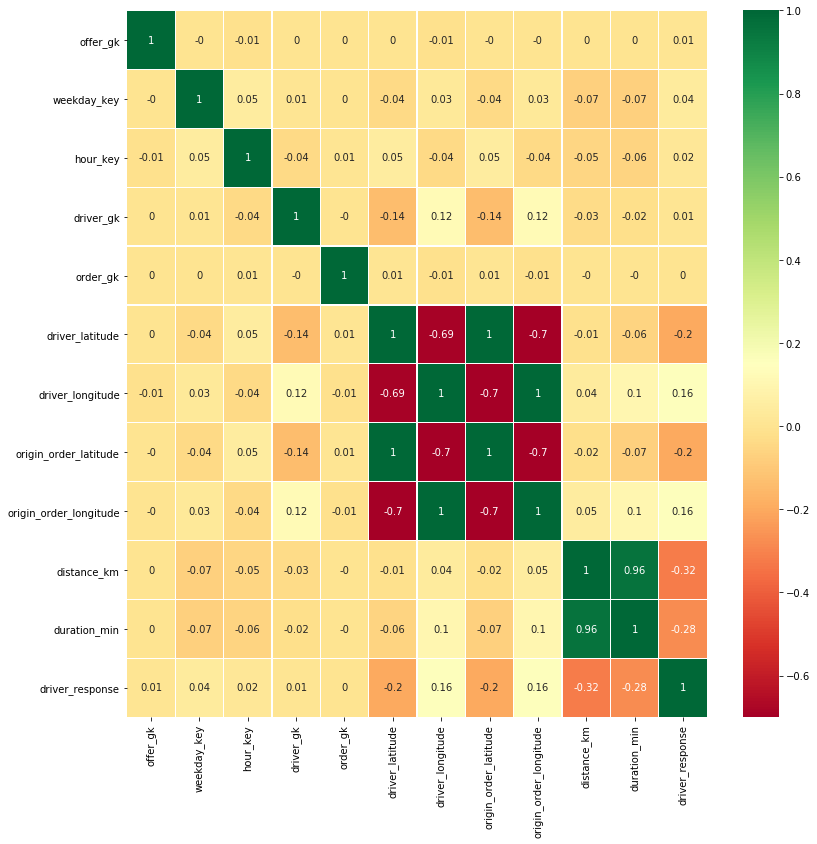

In [37]:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(data.corr(), decimals=2)
sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2)

- "корреляция" между координатами 
- корреляция между расстоянием и длительностью поездки - очевидно есть, один из показателей (длительность) можно убрать. Может быть полезным из длительности извлечь показатель, показывающий превышение длительности на километр (пробки, сложная дорога) на средним значением, или просто скорость

Корреляция Кендалла: коэф-т 0.8428668768775252 , p-value 0.0


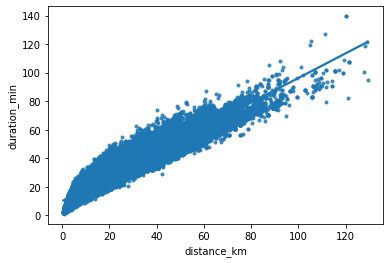

In [38]:
corr, p_value = sts.kendalltau(data.distance_km, data.duration_min)
print('Корреляция Кендалла: коэф-т', corr,', p-value', p_value)
sns.regplot(x=data.distance_km, y=data.duration_min, fit_reg=True,marker=".")

count    99522.000000
mean         0.707784
std          0.218477
min          0.135333
25%          0.536634
50%          0.785628
75%          0.825793
max          1.474560
Name: speed, dtype: float64

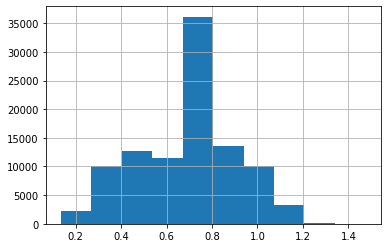

In [39]:
data['speed'] = data.distance_km / data.duration_min
data.speed.hist()
data.speed.describe()

Корреляция Кендалла: коэф-т 0.7435819339255652 , p-value 0.0


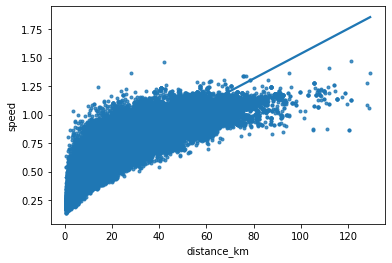

In [40]:
corr, p_value = sts.kendalltau(data.distance_km, data.speed)
print('Корреляция Кендалла: коэф-т', corr,', p-value', p_value)
sns.regplot(x=data.distance_km, y=data.speed, fit_reg=True,marker=".")

- корреляция расстояние -  скорость чуть меньше, чем корреяция расстояние - время (0,74 - 0,84)
- на большие расстояния (между городами?) едут, наверное, по скоротным дорогам - скорость больше, чем в городе, но также ограничена

In [41]:
data[data.distance_km < 20].speed.mean(), data[data.distance_km > 20].speed.mean()

(0.49026328048027257, 0.8440739060465225)

P-value 0.0


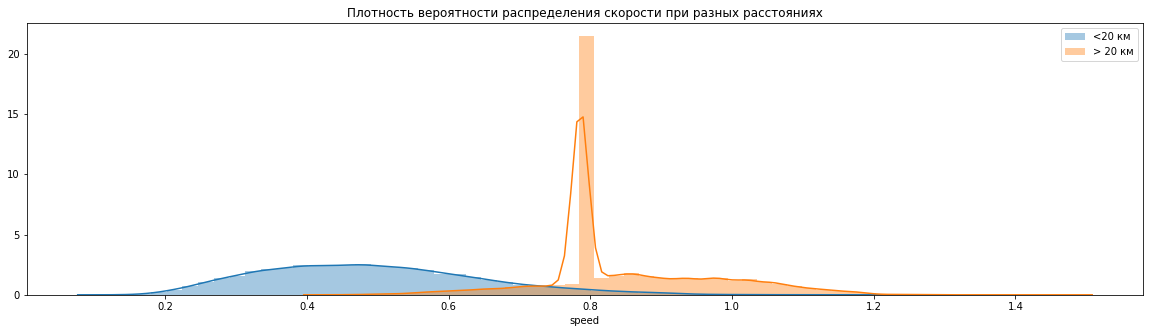

In [42]:
# подготовка данных
city_speed = data[data.distance_km < 20].speed
intercity_speed = data[data.distance_km > 20].speed
# двухвыборочный t-критерий для независимых выборок
statistics, p_value = sts.ttest_ind(city_speed, intercity_speed)
print(f'P-value {p_value}')

plt.figure(figsize=(20,5))
sns.distplot(city_speed, 50, label='<20 км')
sns.distplot(intercity_speed, 50, label='> 20 км')
plt.title('Плотность вероятности распределения скорости при разных расстояниях')
plt.legend()
plt.show()

In [43]:
distance_mean/duration_mean

0.785628298506822

- скорости разные на поездках до 20 км и больше 20 км
- "столб" около 0,8 это пропуски, заполненные средним занчением

## 5. Преобразование категориальных признаков 

- Две категориальные переменные
- сравнивать их между собой некорректно

=> перекодировать с OneHotEncoder

In [44]:
data.describe(include=['object'])
cat_data = data[['offer_class_group', 'ride_type_desc']]

In [45]:
data.offer_class_group.unique()

array(['Economy', 'Standard', 'Other', 'Premium'], dtype=object)

In [46]:
data.ride_type_desc.unique()

array(['private', 'business'], dtype=object)

In [47]:
from sklearn.preprocessing import OneHotEncoder

ohe_enc = OneHotEncoder()
ohe_cats = ohe_enc.fit_transform(cat_data).toarray()
ohe_cats = pd.DataFrame(ohe_cats, columns=np.hstack(ohe_enc.categories_))

In [48]:
ohe_cats

,Economy,Other,Premium,Standard,business,private
0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
99517,1.0,0.0,0.0,0.0,0.0,1.0
99518,1.0,0.0,0.0,0.0,0.0,1.0
99519,0.0,0.0,0.0,1.0,0.0,1.0
99520,1.0,0.0,0.0,0.0,0.0,1.0


- по одному из признаков - убрать!!!

In [49]:
ohe_cats.drop(columns=['business','Other'], inplace=True )

## 6. Выделение/преобразование признаков. Удаление лишних

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99522 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   offer_gk                99522 non-null  int64  
 1   weekday_key             99522 non-null  int64  
 2   hour_key                99522 non-null  int64  
 3   driver_gk               99522 non-null  int64  
 4   order_gk                99522 non-null  int64  
 5   driver_latitude         99522 non-null  float64
 6   driver_longitude        99522 non-null  float64
 7   origin_order_latitude   99522 non-null  float64
 8   origin_order_longitude  99522 non-null  float64
 9   distance_km             99522 non-null  float64
 10  duration_min            99522 non-null  float64
 11  offer_class_group       99522 non-null  object 
 12  ride_type_desc          99522 non-null  object 
 13  driver_response         99522 non-null  int64  
 14  speed                   99522 non-null

- признак - количество предложений заказа нескольким таксистам

In [51]:
orders = data.groupby(by='order_gk').offer_gk.count()
data.loc[:,'offer_num'] = data.loc[:, 'order_gk'].apply(lambda x: orders.loc[x])

In [52]:
data.offer_num

0        2
1        1
2        1
3        1
4        1
        ..
99995    4
99996    2
99997    6
99998    6
99999    3
Name: offer_num, Length: 99522, dtype: int64

- расстояние между такси и клиентом

In [53]:
# ! pip install geopy
from geopy import distance

In [54]:
def dist(row):    
    return distance.distance(
        (row.driver_latitude, row.driver_longitude), 
        (row.origin_order_latitude, row.origin_order_longitude)).km

data['origin_dist'] = data.apply(dist, axis=1)
data.origin_dist.describe()
# data.origin_dist.head()

count    99522.000000
mean         0.990610
std          0.949616
min          0.000000
25%          0.405637
50%          0.654126
75%          1.319985
max         22.358308
Name: origin_dist, dtype: float64

P-value 4.574067737502727e-148


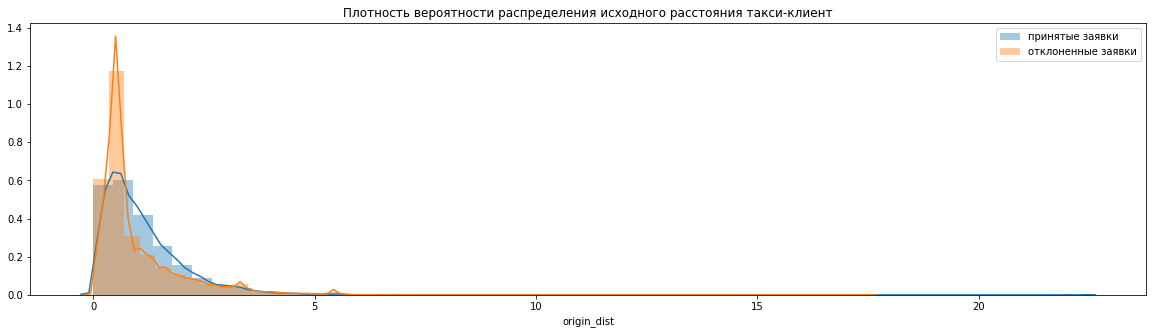

In [55]:
# проверка одинаковости выорок исходных расстояний принятых и отвергнутых заявок
# подготовка данных
accept = data[data.driver_response == 1].origin_dist
not_accept = data[data.driver_response == 0].origin_dist

# двухвыборочный t-критерий для независимых выборок
statistics, p_value = sts.ttest_ind(accept, not_accept)
print(f'P-value {p_value}')

plt.figure(figsize=(20,5))
sns.distplot(accept, 50, label='принятые заявки')
sns.distplot(not_accept, 50, label='отклоненные заявки')
plt.title('Плотность вероятности распределения исходного расстояния такси-клиент')
plt.legend()
plt.show()

In [56]:
data.origin_dist.quantile(0.99)

4.49128189463407

In [57]:
data[data.origin_dist > data.origin_dist.quantile(0.99)].shape

(996, 17)

- есть 996 заявок, в которых таксисту нужно ехать до клиента более 4.5 км (вплоть до 22 км)
- 99% заявок укладываются в 4.5 км, т.е. все, что выше можно считать выбросами

In [58]:
data = data[data.origin_dist < data.origin_dist.quantile(0.99)]

- выборки расстояний у принятых и отвергнутых заявок статистически отличаются

In [59]:
data.shape
num_data = data.drop(columns=[
    'offer_gk', 'order_gk','driver_gk', 
    'driver_latitude', 'driver_longitude',
    'origin_order_latitude', 'origin_order_longitude',
    'duration_min',
    'offer_class_group', 'ride_type_desc',
    'driver_response'
])
num_data.shape

(98526, 6)

In [60]:
num_data.describe()

,weekday_key,hour_key,distance_km,speed,offer_num,origin_dist
count,98526.000000,98526.000000,98526.000000,98526.000000,98526.000000,98526.000000
mean,3.165489,13.885685,24.382992,0.707190,1.766133,0.945831
std,2.052166,7.275603,16.742663,0.218704,1.605311,0.835043
min,0.000000,0.000000,0.505000,0.135333,1.000000,0.000000
25%,1.000000,8.000000,10.985000,0.535729,1.000000,0.405458
50%,3.000000,16.000000,24.458754,0.785628,1.000000,0.649994
75%,5.000000,20.000000,30.486250,0.825417,2.000000,1.290963
max,6.000000,23.000000,129.372000,1.474560,14.000000,4.489634


In [61]:
# проба: исключить из модели origin_dist и speed
# num_data.drop(columns=['origin_dist', 'speed'], inplace=True)

In [62]:
# нормализация числовых данных
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
new_numbers = min_max.fit_transform(num_data)
num_data = pd.DataFrame(new_numbers, columns=num_data.columns)

In [63]:
X = num_data.merge(ohe_cats, left_index=True, right_index=True)
X.head(5)

,weekday_key,hour_key,distance_km,speed,offer_num,origin_dist,Economy,Premium,Standard,private
0,0.833333,0.869565,0.185880,0.485575,0.076923,0.304558,1.0,0.0,0.0,1.0
1,0.833333,0.608696,0.141984,0.455692,0.000000,0.762481,0.0,0.0,1.0,1.0
2,1.000000,0.608696,0.048438,0.413027,0.000000,0.091623,1.0,0.0,0.0,1.0
3,0.333333,0.260870,0.185880,0.485575,0.000000,0.144653,1.0,0.0,0.0,1.0
4,0.666667,0.695652,0.092173,0.379278,0.000000,0.237016,1.0,0.0,0.0,1.0


In [64]:
y = data.driver_response

## 7. Разделение выборки на обучаемую и тестовую

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=13)

## 8. Обучение модели

### RandomForest

In [66]:
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

           0       0.78      0.68      0.73     10090
           1       0.71      0.79      0.75      9616

    accuracy                           0.74     19706
   macro avg       0.74      0.74      0.74     19706
weighted avg       0.74      0.74      0.74     19706

Модель "рандомных деревьев" дала точность предсказания порядка 0.7377448492844819.


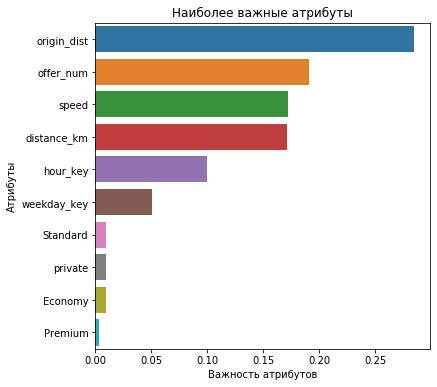

In [67]:
from sklearn.ensemble import RandomForestClassifier

# создание модели деревья решений
#  100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучение модели
model.fit(x_train, y_train)

# расчет качества модели - classification report:
from sklearn.metrics import classification_report

model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

print(f'Модель "рандомных деревьев" дала точность предсказания порядка {model.score(x_test, y_test)}.')

# Наиболее важные атрибуты для модели Random Forest:
headers = list(x_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
# plt.legend()
plt.show()

### XGBoost

In [68]:
import xgboost as xgb
# from sklearn import cross_validation
from sklearn.metrics import accuracy_score

In [69]:
# модель
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [70]:
# предсказание
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [71]:
# оценка
accuracy = accuracy_score(y_test, predictions)
print("Точность: %.2f%%" % (accuracy * 100.0))

Точность: 75.14%


- 0.74 - 0.75
- 0.70 - 0.74 - без origin_dist, speed


### Заключение:
- Построенная модель позволяет предсказывать решение водителя такси в вероятностью (точностью) 70-75% (в зависимости от разбиения на тренировочные и тестовые данные, набора переменных).